In [2]:
pip install --upgrade "ibm-watson>=4.4.0"

Requirement already up-to-date: ibm-watson>=4.4.0 in c:\users\welcome\anaconda3\lib\site-packages (4.4.1)
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install aylien-news-api

Note: you may need to restart the kernel to use updated packages.


In [3]:
from __future__ import print_function
import aylien_news_api
from aylien_news_api.rest import ApiException
from pprint import pprint
configuration = aylien_news_api.Configuration()

# Configure API key authorization: app_id
configuration.api_key['X-AYLIEN-NewsAPI-Application-ID'] = '75a3c792'

# Configure API key authorization: app_key
configuration.api_key['X-AYLIEN-NewsAPI-Application-Key'] = '14646d1168ada4e30e7f288ebe6dcd0f'
configuration.host = "https://api.aylien.com/news"

# Create an instance of the API class
api_instance = aylien_news_api.DefaultApi(aylien_news_api.ApiClient(configuration))

def fetch_new_stories(params={}):
  fetched_stories = []
  stories = None

  while stories is None or len(stories) > 0:
    try:
      response = api_instance.list_stories(**params)
    except ApiException as e:
      if ( e.status == 429 ):
        print('Usage limits are exceeded. Waiting for 60 seconds...')
        time.sleep(60)
        continue

    stories = response.stories
    params['cursor'] = response.next_page_cursor

    fetched_stories += stories
    print("Fetched %d stories. Total story count so far: %d" %
      (len(stories), len(fetched_stories)))

  return fetched_stories

params = {
  'language': ['en'],
  'title': 'Politics',
  'published_at_start': 'NOW-5DAYS',
  'published_at_end': 'NOW',
  'cursor': '*',
  'sort_by': 'published_at'
}

stories = fetch_new_stories(params)

print('************')
print("Fetched %d stories mentioning 'politics' in the title, are in English, and were published between %s and %s" %
(len(stories), params['published_at_start'], params['published_at_end']))

Fetched 10 stories. Total story count so far: 10
Fetched 10 stories. Total story count so far: 20
Fetched 10 stories. Total story count so far: 30
Fetched 10 stories. Total story count so far: 40
Fetched 10 stories. Total story count so far: 50
Fetched 10 stories. Total story count so far: 60
Fetched 10 stories. Total story count so far: 70
Fetched 10 stories. Total story count so far: 80
Fetched 10 stories. Total story count so far: 90
Fetched 10 stories. Total story count so far: 100
Fetched 10 stories. Total story count so far: 110
Fetched 10 stories. Total story count so far: 120
Fetched 10 stories. Total story count so far: 130
Fetched 10 stories. Total story count so far: 140
Fetched 10 stories. Total story count so far: 150
Fetched 10 stories. Total story count so far: 160
Fetched 10 stories. Total story count so far: 170
Fetched 10 stories. Total story count so far: 180
Fetched 10 stories. Total story count so far: 190
Fetched 10 stories. Total story count so far: 200
Fetched 1

In [52]:
import pprint
import requests
import json
from newsapi.newsapi_client import NewsApiClient
from ibm_watson import NaturalLanguageUnderstandingV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
from ibm_watson.natural_language_understanding_v1 import Features,EntitiesOptions,SentimentOptions
url = 'https://newsapi.org/v2/everything?'
parameters = {
    'q': 'politics', # query phrase
    'pageSize': 20,  # maximum is 100
    'apiKey':'13626ce152a348e890604da34423ecdf',# your own API key
    'language': 'en',
    'title': 'Politics',
    'published_at_start': 'NOW-10DAYS',
    'published_at_end': 'NOW',
    'source_locations_country': ['INDIA'],
    'cursor': '*',
    'sort_by': 'published_at'}
authenticator = IAMAuthenticator('4HecLEQUBw03WbfyI1FFubQIoH7TbPtl8TU0RMwGcFMl')
natural_language_understanding = NaturalLanguageUnderstandingV1(version='2019-07-12',authenticator=authenticator)


natural_language_understanding.set_service_url('https://api.eu-gb.natural-language-understanding.watson.cloud.ibm.com/instances/775e9661-0eec-420c-a526-ee3be3d3d5e6')

newsapi=NewsApiClient(api_key="13626ce152a348e890604da34423ecdf")
news=newsapi.get_everything(q='Politics',language='en')
# Make the request
response = requests.get(url,params=parameters)
    

for i in news['articles']:
    response=natural_language_understanding.analyze(
        url=i['url'],features=Features(entities=EntitiesOptions(sentiment=True,limit=1))).get_result()
    print(json.dumps(response, indent=4,sort_keys=True))

{
    "entities": [
        {
            "confidence": 0.985114,
            "count": 3,
            "relevance": 0.95276,
            "sentiment": {
                "label": "negative",
                "score": -0.814538
            },
            "text": "Trump",
            "type": "Person"
        }
    ],
    "language": "en",
    "retrieved_url": "https://www.bbc.com/news/av/world-us-canada-52644735/robert-de-niro-on-coronavirus-lockdown-and-us-politics",
    "usage": {
        "features": 1,
        "text_characters": 3408,
        "text_units": 1
    }
}
{
    "entities": [
        {
            "confidence": 0.968583,
            "count": 1,
            "disambiguation": {
                "dbpedia_resource": "http://dbpedia.org/resource/Winston_Churchill",
                "name": "Winston_Churchill",
                "subtype": [
                    "Politician",
                    "AwardWinner",
                    "ChivalricOrderMember",
                    "MilitaryCommand

In [62]:
#no of postives, negatives and neutral

0neg=0
pos=0
neu=0
for i in news['articles']:
    response=natural_language_understanding.analyze(
        url=i['url'],features=Features(entities=EntitiesOptions(sentiment=True,limit=1))).get_result()
    res=response["entities"]
    v=res[0]
    final=v["sentiment"]
    L=final["label"]
    if L=='negative':
        neg=neg+1
    if L=='positive':
        pos=pos+1
    if L=='neutral':
        neu=neu+1
print(neg)
print(pos)
print(neu)
    
    
    
    

12
3
5


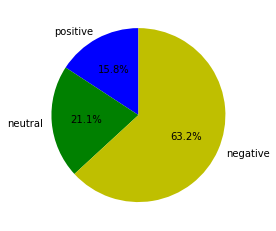

In [58]:
#pie chart

import matplotlib.pyplot as plt
slices_hours = [pos,neu,neg]
sentiments = ['positive', 'neutral','negative']
colors = ['b', 'g','y']
plt.pie(slices_hours, labels=sentiments, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()